In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:00<00:00, 207MB/s]
100% 163M/163M [00:00<00:00, 205MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_950.jpg', 'with_mask_649.jpg', 'with_mask_2050.jpg', 'with_mask_2370.jpg', 'with_mask_3510.jpg']
['with_mask_2020.jpg', 'with_mask_720.jpg', 'with_mask_2519.jpg', 'with_mask_2123.jpg', 'with_mask_3437.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2240.jpg', 'without_mask_2994.jpg', 'without_mask_2212.jpg', 'without_mask_1144.jpg', 'without_mask_1321.jpg']
['without_mask_3182.jpg', 'without_mask_2430.jpg', 'without_mask_2918.jpg', 'without_mask_798.jpg', 'without_mask_1987.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

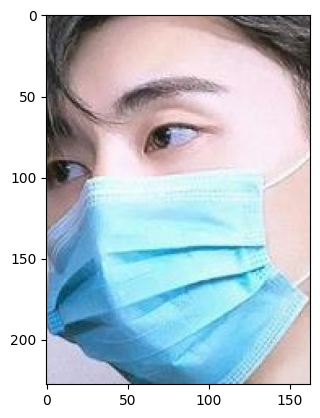

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

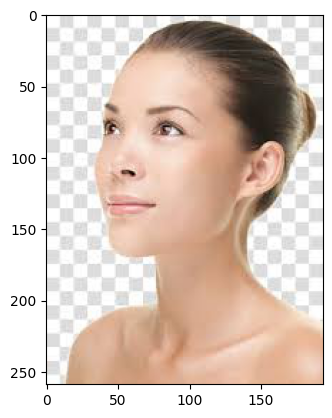

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[ 51,  50,  46],
        [ 53,  52,  48],
        [ 54,  53,  49],
        ...,
        [ 56,  55,  50],
        [ 57,  56,  52],
        [ 58,  57,  53]],

       [[ 54,  53,  49],
        [ 54,  53,  49],
        [ 55,  54,  50],
        ...,
        [ 56,  55,  51],
        [ 57,  56,  52],
        [ 58,  57,  53]],

       [[ 58,  57,  53],
        [ 57,  56,  52],
        [ 56,  55,  51],
        ...,
        [ 57,  56,  52],
        [ 58,  57,  53],
        [ 60,  59,  55]],

       ...,

       [[118, 109, 115],
        [177, 168, 174],
        [157, 149, 154],
        ...,
        [140, 124, 125],
        [140, 124, 125],
        [141, 125, 126]],

       [[107, 103, 111],
        [180, 177, 183],
        [151, 147, 155],
        ...,
        [139, 123, 124],
        [139, 123, 124],
        [139, 123, 124]],

       [[116, 114, 125],
        [109, 107, 117],
        [ 88,  87,  98],
        ...,
        [138, 122, 123],
        [137, 121, 122],
        [138, 122, 123]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[81, 70, 74],
        [78, 67, 71],
        [79, 69, 74],
        ...,
        [29, 13,  1],
        [43, 27, 12],
        [63, 50, 34]],

       [[85, 74, 78],
        [82, 70, 74],
        [76, 65, 69],
        ...,
        [23,  7,  0],
        [29, 13,  2],
        [46, 33, 16]],

       [[82, 70, 72],
        [74, 62, 63],
        [67, 55, 56],
        ...,
        [32, 16,  3],
        [33, 18,  4],
        [32, 19,  3]],

       ...,

       [[ 6,  5,  0],
        [ 7,  6,  3],
        [ 4,  3,  0],
        ...,
        [ 6,  5,  2],
        [ 4,  3,  1],
        [ 4,  3,  0]],

       [[16, 16,  8],
        [ 8,  7,  1],
        [ 2,  1,  0],
        ...,
        [ 7,  6,  1],
        [ 5,  4,  0],
        [ 4,  3,  0]],

       [[17, 17,  9],
        [12, 11,  6],
        [10,  9,  4],
        ...,
        [ 4,  3,  0],
        [ 6,  5,  0],
        [ 7,  3,  0]]], dtype=uint8)

In [31]:
X_train_scaled[0]

array([[[0.31764706, 0.2745098 , 0.29019608],
        [0.30588235, 0.2627451 , 0.27843137],
        [0.30980392, 0.27058824, 0.29019608],
        ...,
        [0.11372549, 0.05098039, 0.00392157],
        [0.16862745, 0.10588235, 0.04705882],
        [0.24705882, 0.19607843, 0.13333333]],

       [[0.33333333, 0.29019608, 0.30588235],
        [0.32156863, 0.2745098 , 0.29019608],
        [0.29803922, 0.25490196, 0.27058824],
        ...,
        [0.09019608, 0.02745098, 0.        ],
        [0.11372549, 0.05098039, 0.00784314],
        [0.18039216, 0.12941176, 0.0627451 ]],

       [[0.32156863, 0.2745098 , 0.28235294],
        [0.29019608, 0.24313725, 0.24705882],
        [0.2627451 , 0.21568627, 0.21960784],
        ...,
        [0.1254902 , 0.0627451 , 0.01176471],
        [0.12941176, 0.07058824, 0.01568627],
        [0.1254902 , 0.0745098 , 0.01176471]],

       ...,

       [[0.02352941, 0.01960784, 0.        ],
        [0.02745098, 0.02352941, 0.01176471],
        [0.01568627, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.4563 - acc: 0.7951 - val_loss: 0.3384 - val_acc: 0.8595
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2820 - acc: 0.8907 - val_loss: 0.2172 - val_acc: 0.9289
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2196 - acc: 0.9172 - val_loss: 0.2206 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1835 - acc: 0.9327 - val_loss: 0.2380 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1383 - acc: 0.9491 - val_loss: 0.2173 - val_acc: 0.9240


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1989 - acc: 0.9272
Test Accuracy = 0.9272005558013916


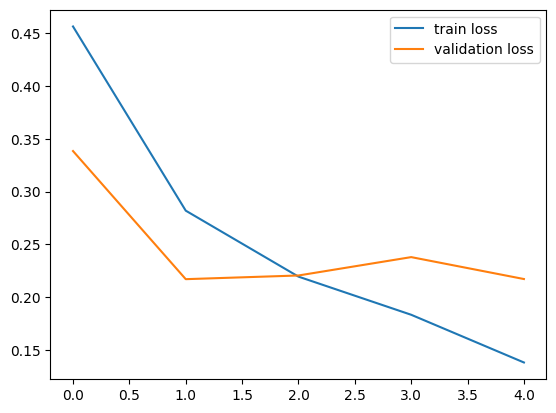

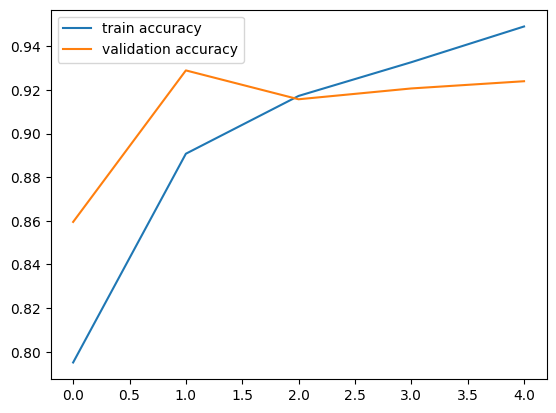

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/download.jpeg


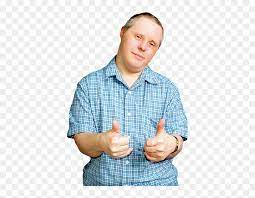

1/1 [==============================] - 0s 28ms/step
[[0.726007   0.28479937]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/images.jpeg


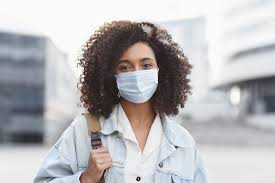

1/1 [==============================] - 0s 20ms/step
[[0.19276346 0.5248691 ]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')